# Introduction to Machine Learning

The *introduction to machine learning* is probably one of the most frequently written web articles. Rather than rewrite this, I will instead introduce the main ideas focused on a chemistry example. Here are some introductory sources, and please do recommend new ones to me:

1. The book I first read in grad school about machine learning by Ethem Alpaydin{cite}`alpaydin2020introduction`
1. Nils Nillson's online book [<ins>Introductory Machine Learning</ins>](https://ai.stanford.edu/~nilsson/mlbook.html)
2. A review of machine learning in materials{cite}`balachandran2019machine`
3. A review of machine learning in computational chemistry{cite}`gomez2020machine`
4. A review of machine Learning in metals{cite}`nandy2018strategies`
    

## The Ingredients 

Machine learning is about learning models with data. Firstly, definitions:

**Features** 

&nbsp;&nbsp;&nbsp;&nbsp;set of $N$ vectors $\{\vec{x}_i\}$ of dimension $D$. Can be reals, integers, classes, etc.

**Labels** 

&nbsp;&nbsp;&nbsp;&nbsp;set of $N$ integers or reals $\{y_i\}$. Note $y_i$ is usually a number and $\vec{x}_i$ is usually a vector (feature vector).
  
**Labeled Data** 

&nbsp;&nbsp;&nbsp;&nbsp;set of $N$ tuples $\{\left(\vec{x}, y\right)_i\}$ 

**Unlabeled Data** 

&nbsp;&nbsp;&nbsp;&nbsp;set of $N$ features  $\{\vec{x}_i\}$  that may have unknown $y$ labels

**Model**

&nbsp;&nbsp;&nbsp;&nbsp;A function $f(\vec{x})$ that takes a given feature vector in and returns a predicted $\hat{y}$

**Predictions**

&nbsp;&nbsp;&nbsp;&nbsp; $\hat{y}$, our predicted output for a given input $\vec{x}$. Can also mean specifically the $\{\hat{y}_i\}$ that come our data

--------

These definitions will become more clear as we use them below.

```{note}
Click the &nbsp;<i aria-label="Launch interactive content" class="fas fa-rocket"></i>&nbsp; above to launch this page as an interactive Google Colab.
```

## Supervised Learning

```{margin} Types of learning
Machine learning has three types of learning: supervised, semi-supervised, and unsupervised. There are two tasks: regression and classification.
```

Our first task will be **supervised learning**. Supervised learning means predicting $y$ from $\vec{x}$ with a model trained on data. It is *supervised* because we tell the algorithm what the labels are in our dataset. Another method we'll explore is **unsupervised learning** where we do not tell the algorithm the labels. 

To see an example, we will use a dataset called AqSolDB{cite}`Sorkun2019` that is about 10,000 unique compounds with measured solubility in water (label). The dataset also includes molecular properties (features) that we can use for machine learning.

### Load Data

Download the data and load it into a [Pandas](https://pandas.pydata.org/) data frame.

```{note}
The hidden cells below sets-up our imports
```

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import numpy as np
from myst_nb import glue
import jax.numpy as jnp
import jax
import sklearn.manifold, sklearn.cluster
import rdkit
import warnings
warnings.filterwarnings('ignore')
sns.set_context('notebook')
sns.set_style('dark',  {'xtick.bottom':True, 'ytick.left':True, 'xtick.color': '#666666', 'ytick.color': '#666666',
                        'axes.edgecolor': '#666666', 'axes.linewidth':     0.8 })
color_cycle = ['#1BBC9B', '#F06060', '#5C4B51', '#F3B562', '#6e5687']
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=color_cycle) 

In [109]:
soldata = pd.read_csv('https://dataverse.harvard.edu/api/access/datafile/3407241?format=original&gbrecs=true')
soldata.head()

,ID,Name,InChI,InChIKey,SMILES,Solubility,SD,Ocurrences,Group,MolWt,...,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT
0,A-3,"N,N,N-trimethyloctadecan-1-aminium bromide",InChI=1S/C21H46N.BrH/c1-5-6-7-8-9-10-11-12-13-...,SZEMGTQCPRNXEG-UHFFFAOYSA-M,[Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C,-3.616127,0.0,1,G1,392.510,...,17.0,142.0,0.0,0.0,0.0,0.0,0.00,158.520601,0.000000e+00,210.377334
1,A-4,Benzo[cd]indol-2(1H)-one,InChI=1S/C11H7NO/c13-11-8-5-1-3-7-4-2-6-9(12-1...,GPYLCFQEKPUWLD-UHFFFAOYSA-N,O=C1Nc2cccc3cccc1c23,-3.254767,0.0,1,G1,169.183,...,0.0,62.0,2.0,0.0,1.0,3.0,29.10,75.183563,2.582996e+00,511.229248
2,A-5,4-chlorobenzaldehyde,InChI=1S/C7H5ClO/c8-7-3-1-6(5-9)2-4-7/h1-5H,AVPYQKSLYISFPO-UHFFFAOYSA-N,Clc1ccc(C=O)cc1,-2.177078,0.0,1,G1,140.569,...,1.0,46.0,1.0,0.0,0.0,1.0,17.07,58.261134,3.009782e+00,202.661065
3,A-8,"zinc bis[2-hydroxy-3,5-bis(1-phenylethyl)benzo...",InChI=1S/2C23H22O3.Zn/c2*1-15(17-9-5-3-6-10-17...,XTUPUYCJWKHGSW-UHFFFAOYSA-L,[Zn++].CC(c1ccccc1)c2cc(C(C)c3ccccc3)c(O)c(c2)...,-3.924409,0.0,1,G1,756.226,...,10.0,264.0,6.0,0.0,0.0,6.0,120.72,323.755434,2.322963e-07,1964.648666
4,A-9,4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...,InChI=1S/C25H30N2O4/c1-5-20(26(10-22-14-28-22)...,FAUAZXVRLVIARB-UHFFFAOYSA-N,C1OC1CN(CC2CO2)c3ccc(Cc4ccc(cc4)N(CC5CO5)CC6CO...,-4.662065,0.0,1,G1,422.525,...,12.0,164.0,2.0,4.0,4.0,6.0,56.60,183.183268,1.084427e+00,769.899934


### Data Exploration
We can see that there are a number of features like molecular weight, rotatable bonds, valence electrons, etc. And of course, there is the label **solubility**. One of the first things we should always do is get familiar with our data. Let's just see some specific example, extremes, and get a sense of the range of labels/data. We'll start with seeing what kind of molecules there are.

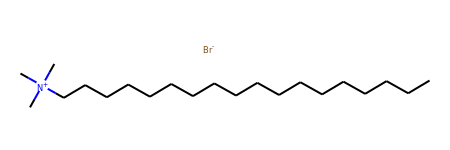

In [14]:
# plot one molecule
mol = rdkit.Chem.MolFromInchi(soldata.InChI[0])
mol

This is first molecule in the dataset rendered using [rdkit](https://rdkit.org/)

Let's now look at the extreme values to get a sense of the **range** of solubility data and the molecules that make it. First, we'll histogram the solubillity which tells us about the shape of its probability distribution and the extreme values.

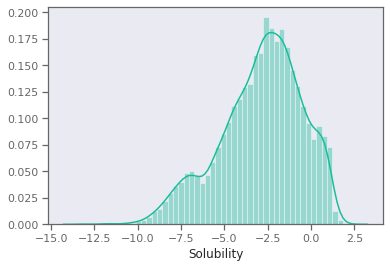

In [116]:
sns.distplot(soldata.Solubility)
plt.show()

Above we can see the histogram of the solubility with kernel density estimate overlain. The histogram shows that the solubility varies from about 13 to 2.5 and is not normally distributed. 

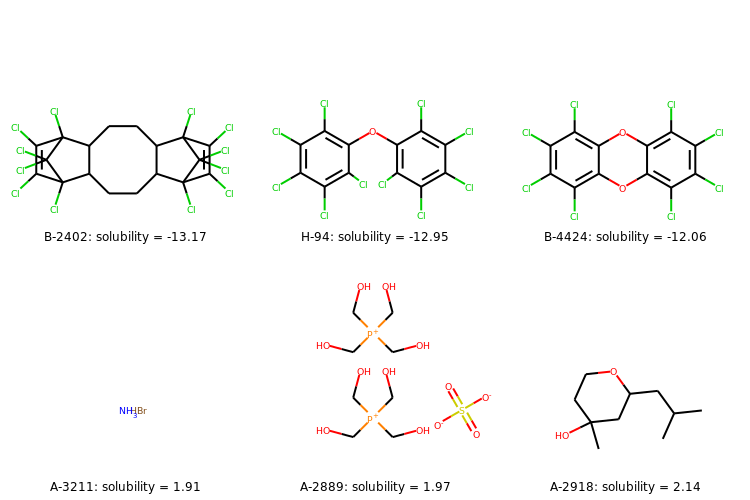

In [6]:
# get 3 lowest and 3 highest solubilities
soldata_sorted = soldata.sort_values('Solubility')
extremes = pd.concat( [soldata_sorted[:3], soldata_sorted[-3:]] )

# pardon this slop, we need to have a list of strings for legends
legend_text = [f'{i}: solubility = {s:.2f}' for i,s in zip(extremes.ID, extremes.Solubility)]

# now plot them on a grid
extreme_mols = [rdkit.Chem.MolFromInchi(inchi) for inchi in extremes.InChI]
rdkit.Chem.Draw.MolsToGridImage(extreme_mols,molsPerRow=3,
                     subImgSize=(250,250),
                     legends=legend_text)

The figure of extreme molecules shows highly-chlorinated compounds have the lowest solubility and ioinc compounds have higher solubility. Is A-2918 an **outlier**, a mistake? Also, is NH$_3$ really comparable to these organic compounds? These are the kind of questions that you should consider *before* doing any modeling.

```{margin} Outliers

Outliers are extreme values that fall outside of your normal data distribution. They can be mistakes, be from a different distribution (e.g., metals instead of organic molecules), and can have a strong effect on model training.

```

### Feature Correlation
Now let's examine the features and see how correlated they are with solubility. Note that there are a few columns unrelated to features or solubility: `SD` (standard deviation), `Ocurrences` (how often the molecule occured in the constituent databases), and `Group` (where the data came from).

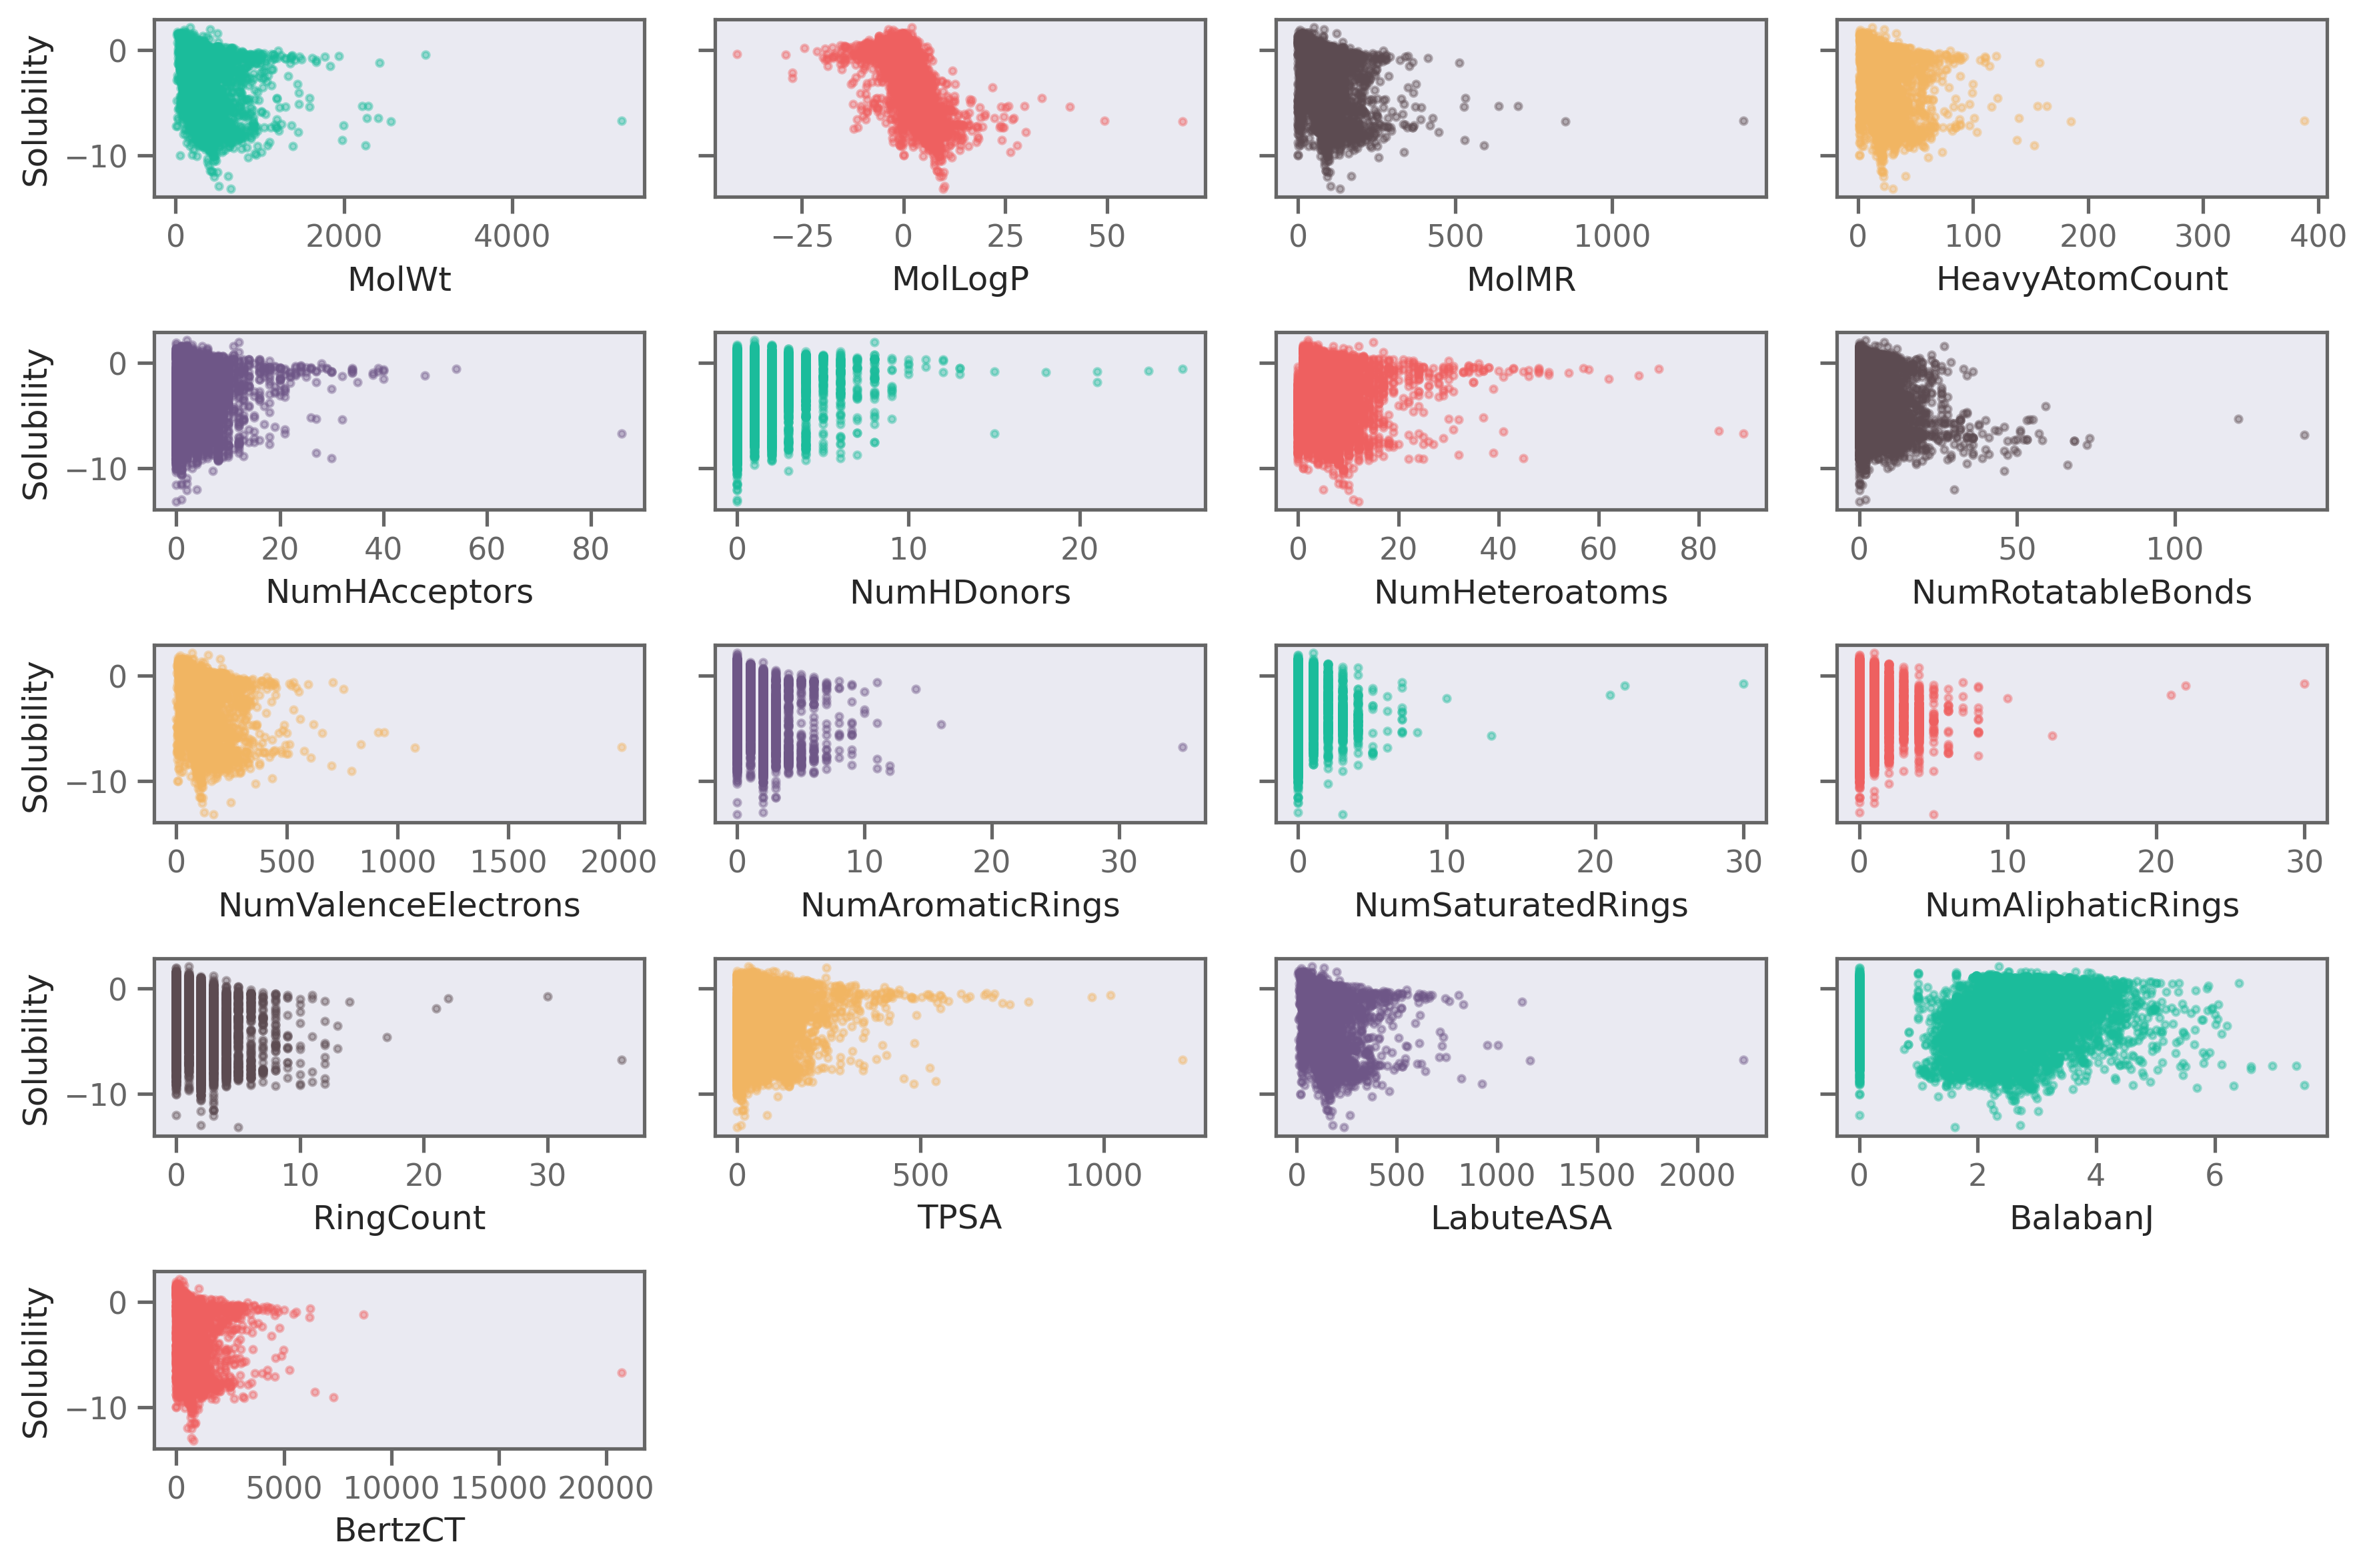

In [117]:
features_start_at = list(soldata.columns).index('MolWt')
feature_names = soldata.columns[features_start_at:]

fig, axs = plt.subplots(nrows=5, ncols=4, sharey=True, figsize=(12, 8), dpi=300)
axs = axs.flatten() # don't want to think about i/j
for i,n in enumerate(feature_names):
    ax = axs[i]
    ax.scatter(
        soldata[n], soldata.Solubility, 
        s = 6, alpha=0.4,
        color = color_cycle[i % len(color_cycle)]) # add some color 
    if i % 4 == 0:
        ax.set_ylabel('Solubility')
    ax.set_xlabel(n)
# hide empty subplots
for i in range(len(feature_names), len(axs)):
    fig.delaxes(axs[i])
plt.tight_layout()
plt.show()

It's interesting that molecular weight or hydrogen bond numbers seem to have little correlation, at least from this plot. MolLogP, which is a computed estimated related to solubility, does correlate well. You can also see that some of these features have low **variance**, meaning the value of the feature is the same for many data points (e.g., "NumHDonors").

### Linear Model

Let's begin with one of the simplest approaches — a linear model. This is our first type of supervised learning and is rarely used due to something we'll see — the difficult choice of features. 


```{margin} Autodiff
[Autodiff](https://en.wikipedia.org/wiki/Automatic_differentiation) is a computer program tool
that can compute analytical gradients with respect to two variables in a program. 
```

Our model will be defined by this equation:

\begin{equation}
    y = \vec{w} \cdot \vec{x} + b
\end{equation}

where $\vec{w}$ is a vector of adjustable parameters and $b$ is also adjustable (called **bias**). Let us define it. We'll be using a library called [``jax``](https://jax.readthedocs.io/en/latest/notebooks/quickstart.html) that is very similar to numpy except it can compute analytical gradients easily via autodiff.


In [119]:
def linear_model(x, w, b):
    return jnp.dot(x,w) + b

# test it out
x = np.array([1, 0, 2.5])
w = np.array([0.2, -0.5, 0.4])
b = 4.3

linear_model(x, w, b)

DeviceArray(5.5, dtype=float32)

```{margin} Loss
A loss is a function which takes in a model prediction $\hat{y}$,
labels $y$, and computes a scalar representing how poor the fit is.
Our goal is to minimize loss.
```

Now comes the critical question: *How do we find the adjustable parameters $\vec{w}$ and $b$*? 

This question has led to thousands of papers and there are many good ideas. I will take a shortcut and skip to a modern answer: we pick a **loss** function and minimize with **gradients**. Let's define these quantities and compute our loss with some initial random w and b

In [120]:
# convert data into features, labels
features = soldata.loc[:, feature_names].values
labels = soldata.Solubility.values

feature_dim = features.shape[1]

# initialize our parmaters
w = np.random.normal(size=feature_dim)
b = 0.

# define loss
def loss(y, labels):
    return jnp.sqrt(jnp.mean((y - labels)**2))

# test it out
y = linear_model(features, w, b)
loss(y, labels)

DeviceArray(502.78766, dtype=float32)

Wow! Our loss is terrrible, especially considering that solubilities are between -13 and 2. But, that's right since we just guessed our initial parameters. 



### Gradient Descent

We will now try to reduce loss by using information about how it changes with respect to the adjustable parameters. If we write our loss as:

\begin{equation}
    L = \frac{1}{N}\sum_i^N \left[y_i - f(\vec{x}_i, \vec{w}, b)\right]^2
\end{equation}


```{margin} jax.grad
This computes an analytical derivative a python function. 
It takes two arguments: the function and which args to 
take the derivative of. For example, consider `f(x, y, z)`, then `jax.grad(f,(1,2))`
gives $\frac{\partial f}{\partial x}, \frac{\partial f}{\partial y}$. Note too that
$x$ may be a tensor. [API](https://jax.readthedocs.io/en/latest/jax.html#jax.grad)
```


we can compute our loss gradients with respect to the adjustable parameters:

\begin{equation}
    \frac{\partial L}{\partial \vec{w}}, \frac{\partial L}{\partial \vec{b}}
\end{equation}

we can try to reduce its value by taking a step in the direction of its negative gradient:
\begin{equation}
    (w', b') = \left(w - \eta \frac{\partial L}{\partial \vec{w}}, b - \eta\frac{\partial L}{\partial \vec{b}}\right)
\end{equation}

where $\eta$ is **learning rate** , which an adjustable but not trained parameter (an example of a **hyperparameter**) which we just guess to be 0.0001 in this example. Typically it's chosen to be some power of 10 that is at most 0.1. Let's try this procedure, which is called **gradient descent**.


In [121]:
# compute gradients
def loss_wrapper(w, b, data):
    features = data[0]
    labels = data[1]
    y = linear_model(features, w, b)
    return loss(y, labels)
loss_grad = jax.grad(loss_wrapper, (0,1))

# test it out
loss_grad(w, b, (features, labels))

(DeviceArray([2.1991435e+02, 1.0555136e+00, 5.5987907e+01, 1.5339144e+01,
              3.5650947e+00, 8.2670599e-01, 4.8644209e+00, 2.4103251e+00,
              7.7785103e+01, 1.4610404e+00, 1.4876010e-01, 3.4913799e-01,
              1.8101782e+00, 5.9470882e+01, 9.4171768e+01, 6.3184226e-01,
              6.6471149e+02], dtype=float32),
 DeviceArray(0.39229506, dtype=float32))

We've computed the gradient. Now we'll minimize it over a few steps.

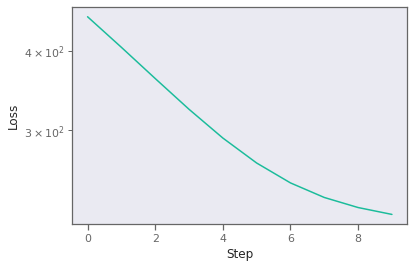

In [122]:
loss_progress = []
eta = 1e-4
data = (features, labels)
for i in range(10):
    grad = loss_grad(w,b, data)
    w -= eta * grad[0]
    b -= eta * grad[1]
    loss_progress.append(loss_wrapper(w, b, data))
plt.plot(loss_progress)

plt.xlabel('Step')
plt.yscale('log')
plt.ylabel('Loss')
plt.show()

### Batching

```{margin} batch
A batch is a subset of your data of size *batch size*. Batch size is usually as a power of 2 (e.g., 16, 128).
Having random batches of data is how gradient descent becomes stochastic gradient descent.
```

This is making good progress. But let's try to speed things up with a small change. We'll use **batching**, which is how training is actually done in machine learning.  The small change is that rather than using all data at once, we only take a small **batch** of data. Batching provides two benefits: it reduces the amount of time to compute an update to our parameters and it makes the training process random. The randomness makes it possible to escape local minima that might stop training progress. This addition of batching makes our algorithm **stochastic** and thus we call this procedure **stochastic gradient descent** (SGD). SGD, and variations of it, are the most common methods of training in deep learning.


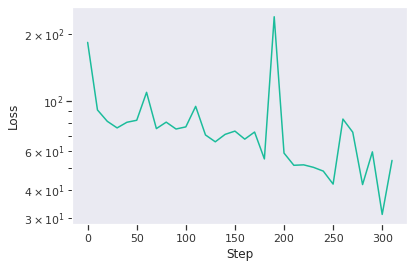

In [21]:
# initialize our parmaters
# to be fair to previous method
w = np.random.normal(size=feature_dim)
b = 0.

loss_progress = []
eta = 1e-4
batch_size = 32
N = len(labels) # number of data points
data = (features, labels)
# compute how much data fits nicely into a batch
# and drop extra data
new_N = len(labels) // batch_size * batch_size
num_epochs = 3

# the -1 means that numpy will compute
# what that dimension should be
batched_features =  features[:new_N].reshape((-1, batch_size, feature_dim))
batched_labels = labels[:new_N].reshape((-1, batch_size))
# to make it random, we'll iterate over the batches randomly
indices = np.arange(new_N // batch_size)
np.random.shuffle(indices)
for i in indices:
    # choose a random set of 
    # indices to slice our data 
    grad = loss_grad(w,b, (batched_features[i], batched_labels[i]))
    w -= eta * grad[0]
    b -= eta * grad[1]
    # we still compute loss on whole dataset, but not every step
    if i % 10 == 0:
        loss_progress.append(loss_wrapper(w, b, data))

plt.plot(np.arange(len(loss_progress)) * 10, loss_progress)
plt.xlabel('Step')
plt.yscale('log')
plt.ylabel('Loss')
plt.show()

### ML Trick: Standardize features

It seems we cannot get past a certain loss. If you examine the gradients you'll see some of them are very large and some are very small. Each of the features have different magnitudes. Like molecular weight, which is lagre, and number of rings which is small. Each of these must use the same learning rate, $\eta$, and that is ok for some but too small for others. If we increase $\eta$, our training procedure will explode because of these larger feature gradients. A standard trick we can do is make all the features have the same magnitude, using the equation for standardization you might see in your statistics textbook:

\begin{equation}
    x_ij = \frac{x_ij - \bar{x_j}}{\sigma_{x_j}}
\end{equation}

where $\bar{x_j}$ is column mean and $\sigma_{x_j}$ is column standard deviation. 

In [22]:
fstd = np.std(features, axis=0)
fmean = np.mean(features, axis=0)
std_features = (features - fmean) / fstd

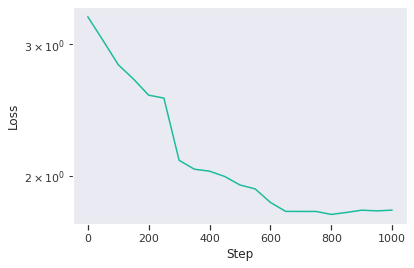

In [23]:
# initialize our parmaters
# since we're changing the features
w = np.random.normal(scale=0.1, size=feature_dim)
b = 0.


loss_progress = []
eta = 1e-2
batch_size = 32
N = len(labels) # number of data points
data = (std_features, labels)
# compute how much data fits nicely into a batch
# and drop extra data
new_N = len(labels) // batch_size * batch_size
num_epochs = 3

# the -1 means that numpy will compute
# what that dimension should be
batched_features =  std_features[:new_N].reshape((-1, batch_size, feature_dim))
batched_labels = labels[:new_N].reshape((-1, batch_size))
indices = np.arange(new_N // batch_size)

# iterate through the dataset 3 times
for epoch in range(3):
    # to make it random, we'll iterate over the batches randomly
    np.random.shuffle(indices)
    for i in indices:
        # choose a random set of 
        # indices to slice our data 
        grad = loss_grad(w,b, (batched_features[i], batched_labels[i]))
        w -= eta * grad[0]
        b -= eta * grad[1]
        # we still compute loss on whole dataset, but not every step
        if i % 50 == 0:
            loss_progress.append(loss_wrapper(w, b, data))

plt.plot(np.arange(len(loss_progress)) * 50, loss_progress)
plt.xlabel('Step')
plt.yscale('log')
plt.ylabel('Loss')
plt.show()

Notice we safely increased our learning rate to 0.01, which is possible because all the features are of similar magnitude. We also could keep training, since we're gaining improvements. 

### Analyzing Model Performance

This is a large topic that we'll explore more, but the first thing we typically examine in supervised learning is a **parity plot**, which shows our predictions vs. our label prediction. What's nice about this plot is that it works no matter what the dimensions of the features are. A perfect fit would fall onto the line at $y = \hat{y}$

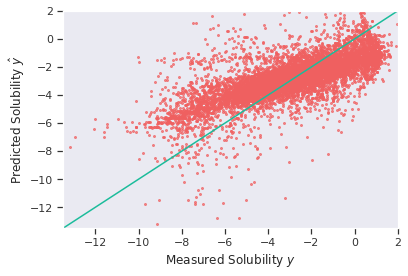

In [24]:
predicted_labels = linear_model(std_features, w, b)

plt.plot([-100, 100], [-100, 100])
plt.scatter(labels, predicted_labels, s=4, alpha=0.7, color=color_cycle[1])
plt.xlabel('Measured Solubility $y$')
plt.ylabel('Predicted Solubility $\hat{y}$')
plt.xlim(-13.5, 2)
plt.ylim(-13.5, 2)
plt.show()

## Unsupervised Learning

In unsupervised learning, the goal is to predict $\hat{y}$ *without* labels. This seems like an impossible task. How do we judge success? Typically, unsupervised learning can be broken into three categories:

**Clustering**

&nbsp;&nbsp;&nbsp;&nbsp; Here we assume $\{y\}_i$ is a class variable and try to separate our features into these classes

```{margin} Class
In machine learning, a class is a type of label like ``dog`` or ``cat``. Formally,
we have a set of possible labels (e.g., all animals) and each feature vector has one (hard) or a 
probability distribution of classes (soft).
```

**Finding Signal**

&nbsp;&nbsp;&nbsp;&nbsp; $\vec{x}$ is made of two components: noise and signal ($y$). We try to find $y$ from $x$ and discard noise. Highly-related and overlaps with **representation learning**, which we'll see later.

**Generative**

&nbsp;&nbsp;&nbsp;&nbsp; Generative methods are methods where we try to learn $P(\vec{x})$ so that we can sample new values of $\vec{x}$. It is analogous to $y$ being probability and we're trying to estimate it. We'll see these more later.



### Clustering

Clustering is historically one of the most well-known and still popular machine learning methods. It's always popular because it can provide new insight from data. Clustering gives class labels where none existed and thus can help find patterns in data. This is also a reason that it's become less popular in chemistry (and most fields): there is no right or wrong answer. Two people doing clustering independently will often arrive at different answers. Nevertheless, it should be a tool you know and can be a good exploration strategy. 


We'll look at the classic clustering method: k-means. Wikipedia has a [great article](https://en.wikipedia.org/wiki/K-means_clustering) on this classic algorithm, so I won't try to repeat that. To make our clustering actually visible, we'll start by projecting our features into 2 dimensions. This will be covered in representation learning, so don't worry about these steps.

In [34]:
# get down to 2 dimensions for easy visuals
embedding = sklearn.manifold.Isomap(n_components=2)
# only fit to every 25th point to make it fast
embedding.fit(std_features[::25, :])
reduced_features = embedding.transform(std_features)

We're gonig to zoom into the 99th percentile of the data since some of the points are extremely far away (though that is interesting!). 

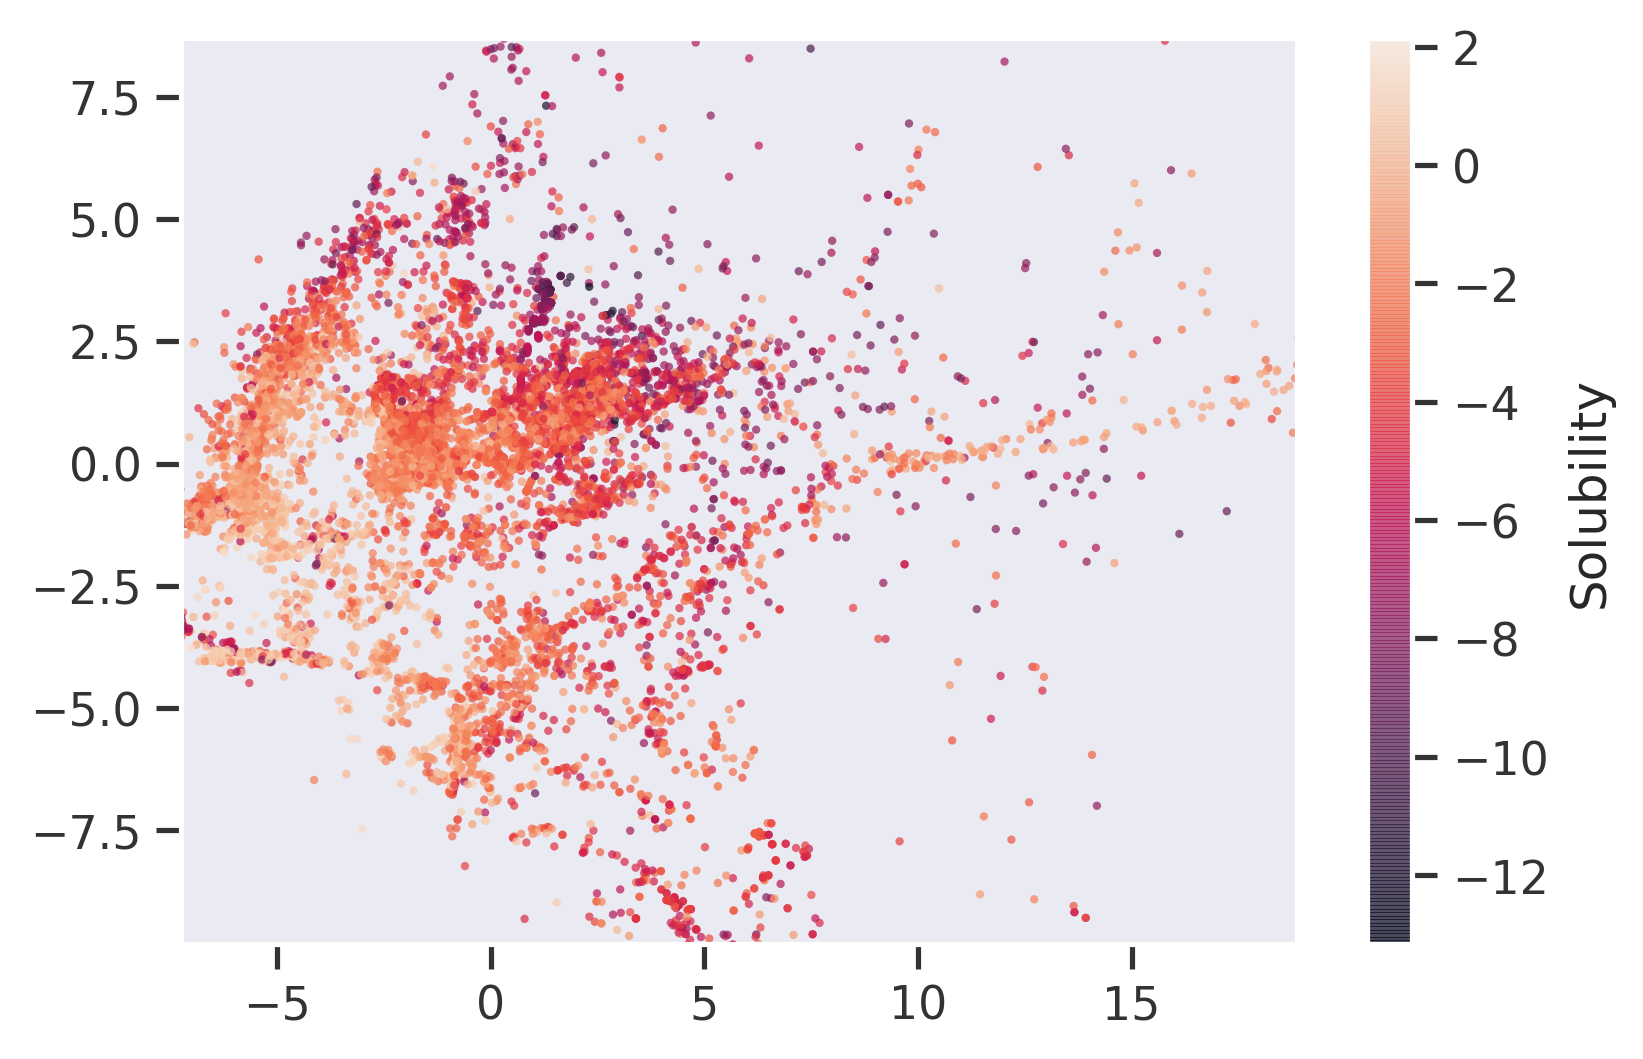

In [102]:
xlow, xhi = np.quantile(reduced_features, [0.005, 0.995], axis=0)

plt.figure(dpi=300)
plt.scatter(
    reduced_features[:,0], reduced_features[:,1], 
    s=4, alpha=0.7, c=labels, edgecolors='none')
plt.xlim(xlow[0], xhi[0])
plt.ylim(xlow[1], xhi[1])
cb = plt.colorbar()
cb.set_label('Solubility')
plt.show()

```{margin} Dimensionality Reduction
Reducing $\vec{x}$, your feature vectors to a low
dimensional space. The classic example is PCA, which is a 
linear operator. However, most prefer non-linear methods 
like [t-SNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html).
```



The dimensionality reduction has made our features only 2 dimensions. We can see some structure, especially with the solubility as the coloring. Note in these kind of plots, where we have reduced dimensions in someway, we do not label the axes beceause they are arbitrary.

Now we cluster. The main challenge in clustering is deciding how many clusters there should be. There are a number of methods out there, but they basically come down to intuition. You, as the chemist, should use some knowledge outside of the data to intuit what is the cluster number. Sounds unscientific? Yeah, that's why clustering hard.

In [81]:
# cluster - using whole features 
kmeans = sklearn.cluster.KMeans(n_clusters=4, random_state=0)
kmeans.fit(std_features)

KMeans(n_clusters=4, random_state=0)

Very simple procedure! Now we'll visualize by coloring our data by the class assigned. 

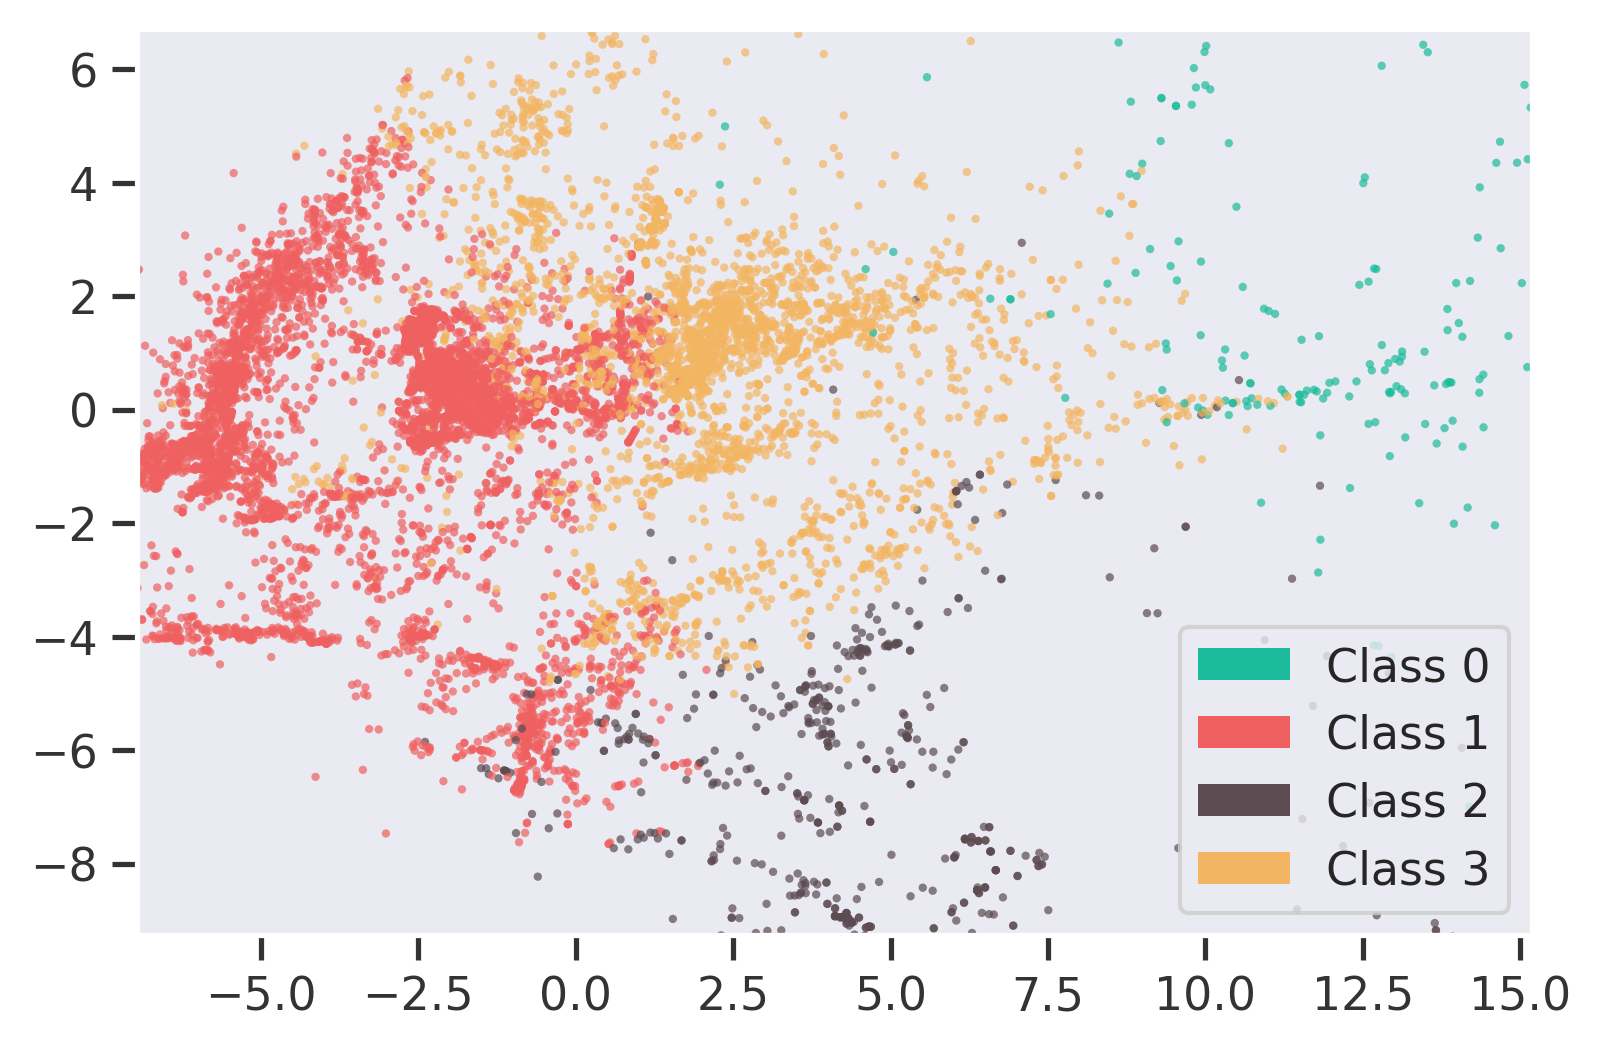

In [91]:
plt.figure(dpi=300)
point_colors = [color_cycle[i] for i in kmeans.labels_]
plt.scatter(
    reduced_features[:,0], reduced_features[:,1], 
    s=4, alpha=0.7, c=point_colors, edgecolors='none')
# make legend
legend_elements = [ 
    mpl.patches.Patch(facecolor=color_cycle[i], edgecolor='none',
          label=f'Class {i}') for i in range(4)]
plt.legend(handles=legend_elements)
plt.xlim(xlow[0], xhi[0])
plt.ylim(xlow[1], xhi[1])
plt.show()

### Choosing Cluster Number

How do we know we had the correct number? Intuition. There is one tool we can use to help us, called an **elbow plot**. The k-means method can give you the mean square distance from cluster center, basically its version of a loss function. However, if we treat cluster number as some kind of adjustable parameter we'd find the best fit at the cluster number being equal to number of data points. Not helpful. However, we can see when its slope starts to become constant and assume that those extra clusters add no new insight. Let's plot it and see what happens. Note we'll be using a subsample of the dataset to save time.

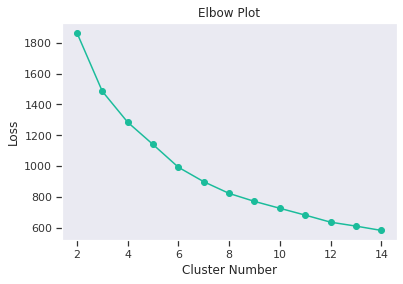

In [88]:
# make an elbow plot
loss = []
cn = range(2, 15)
for i in cn:
    kmeans = sklearn.cluster.KMeans(n_clusters=i, random_state=0)
    # use every 50th point
    kmeans.fit(std_features[::50])
    # we get score -> opposite of loss
    # so take -
    loss.append(-kmeans.score(std_features[::50]))

plt.plot(cn, loss, 'o-')
plt.xlabel('Cluster Number')
plt.ylabel('Loss')
plt.title('Elbow Plot')
plt.show()

Where is the transition? If I squint, maybe at 6? 3? 4? 7? Let's choose 4 because it sounds nice and is plausible based on the data. The last task is to get some insight into what the clusters actually are. We can extract the most centered data points (closest to cluster center) and consider them to be representatitive of the cluster. 

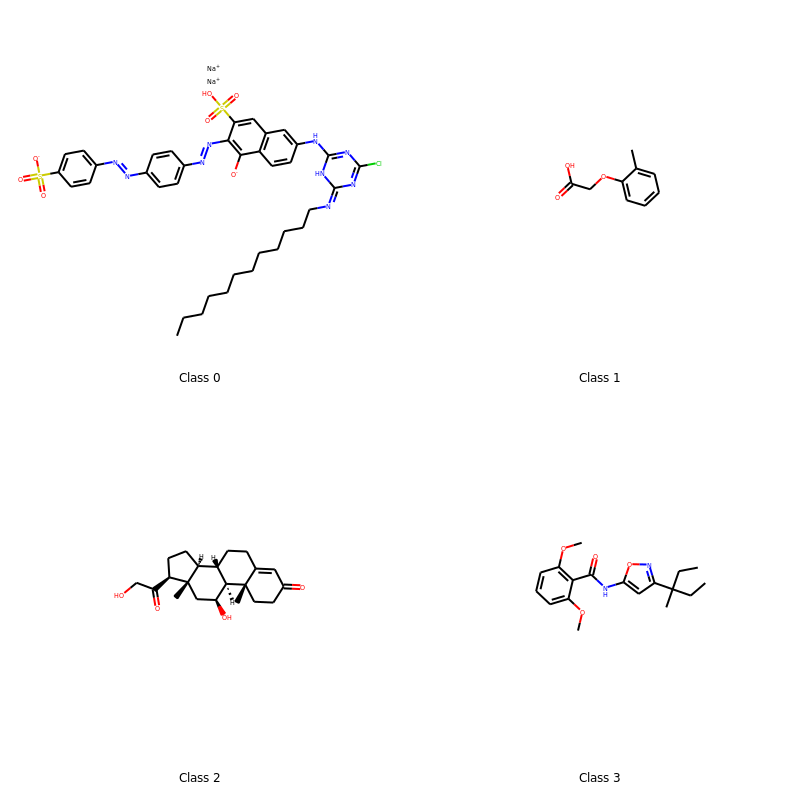

In [105]:
# cluster - using whole features 
kmeans = sklearn.cluster.KMeans(n_clusters=4, random_state=0)
kmeans.fit(std_features)

cluster_center_idx = []
for c in kmeans.cluster_centers_:
    # find point closest
    i = np.argmin(np.sum((std_features - c)**2, axis=1))
    cluster_center_idx.append(i)
cluster_centers = soldata.iloc[cluster_center_idx, :]

legend_text = [f'Class {i}' for i in range(4)]

# now plot them on a grid
cluster_mols = [rdkit.Chem.MolFromInchi(inchi) for inchi in cluster_centers.InChI]
rdkit.Chem.Draw.MolsToGridImage(cluster_mols,molsPerRow=2,
                     subImgSize=(400,400),
                     legends=legend_text)

So what exactly are these classes? Unclear. We intentionally did not reveal solubility (unsupervsied learning) so there is not necessarily any connection with solubility. These classes are more a result of which features were chosen for the dataset. You could make a hypothesis, like class 1 is all negatively charged or class 0 is aliaphatic, and investigate. Ultimately though there is no *best* clustering and often unsupervised learning is more about finding insight or patterns and not about producing a highly-accurate model.

## Summary

* Machine learning is building models that can predict labels ($y$) from input features $\vec{x}$.
* Data can be labeled or unlabeled. 
* Supervised learning is building models that can predict labels by training them on labeled data.
* Models are trained by minimizing loss with gradient descent.
* Unsupervised learning is building models that can predict labels by training on unlabeled data.
* Clustering is unsupervised learning where the predicted labels are classes

## Cited References

```{bibliography} references.bib
```